In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('/content/titanic/train.csv')
train_data.head()

test_data = pd.read_csv('/content/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_data.isnull().sum()

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
#There's nothing super special about these IDs,
#so we will drop them from both the test and train datasets.
train_data.drop('PassengerId', axis = 1, inplace=True)
test_data.drop('PassengerId', axis = 1, inplace=True)

#The names of passenger are no longer necessary and can be dropped.
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis = 1, inplace= True)

<Axes: ylabel='Sex'>

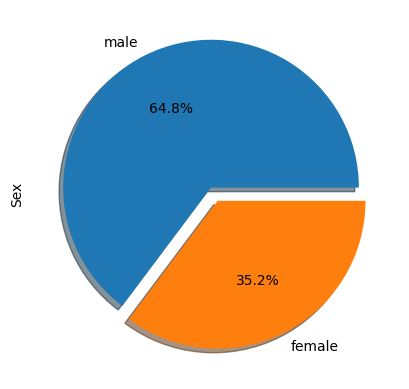

In [5]:
# pai chart for male/female
train_data['Sex'].value_counts().plot(kind="pie",explode=[0.05 for x in train_data['Sex'].dropna().unique()],autopct='%1.1f%%', shadow=True)

In [6]:
train_data.dtypes

#sex is catogorial hence
# Using map function
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})

train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()


,Sex,Survived
0,0,0.742038
1,1,0.188908


In [7]:
train_data.isnull().sum()
#considarable null values in cabin so drop
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis= 1, inplace = True)

# replace age null by mean valu
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data.isnull().sum()

# drop emabarked null rows
train_data.dropna(subset=['Embarked'], inplace=True)
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [9]:
train_data.shape

train_data.dtypes

#get count of embarked
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# replace original embarked by dummies
train_data=pd.get_dummies(train_data,columns=['Embarked'])
train_data.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Ticket         object
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [11]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

X = train_data.drop('Survived',axis = 1)
y = train_data[['Survived']]

# Convert non-numeric data to numeric data
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)  # Filling any possible NaN values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_clf = RandomForestClassifier(max_depth = 4, random_state=42)
rf_clf.fit(X_train, y_train.values.ravel())

print('Max depth', 4)

prediction = rf_clf.predict(X_test)
print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test, prediction)))

print('Precision score: {0:0.4f}'.format(precision_score(y_test, prediction)))

print(confusion_matrix(y_test, prediction))

feature_names = X.columns.to_list()
importances = rf_clf.feature_importances_

i = 0
while i < len(feature_names):
    print('Feature importance:', feature_names[i], round(importances[i], 2)*100, '%')
    i += 1
    print()

Max depth 4
Model accuracy: 0.8231
Precision score: 0.8537
[[172  12]
 [ 40  70]]
Feature importance: Pclass 15.0 %

Feature importance: Sex 42.0 %

Feature importance: Age 9.0 %

Feature importance: SibSp 3.0 %

Feature importance: Parch 3.0 %

Feature importance: Ticket 9.0 %

Feature importance: Fare 15.0 %

Feature importance: Embarked_C 2.0 %

Feature importance: Embarked_Q 1.0 %

Feature importance: Embarked_S 2.0 %

